In [1]:
import json
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def labelme_to_yolo(json_file_path, image_width, image_height,output_folder_path):
    import json

    # Read the JSON file
    with open(json_file_path, 'r') as f:
        data = json.load(f)

    # Initialize the YOLO formatted annotations list
    yolo_annotations = []

    # Define a dictionary to map class labels to class indices
    class_mapping = {
        "backgound plant": 0,
        "leaf": 1,
        "defect": 2,
        # Add more class labels here if needed
    }

    # Process each shape (object) in the JSON file
    for shape in data['shapes']:
        label = shape['label']
        if label in class_mapping:
            class_idx = class_mapping[label]
        else:
            # Skip shapes with labels not in class_mapping
            continue

        # Get the polygon vertices and calculate the bounding box coordinates
        points = shape['points']
        x_coordinates = [point[0] for point in points]
        y_coordinates = [point[1] for point in points]
        x_min = min(x_coordinates)
        x_max = max(x_coordinates)
        y_min = min(y_coordinates)
        y_max = max(y_coordinates)

        # Convert bounding box coordinates to YOLO format (normalized)
        box_width = (x_max - x_min) / image_width
        box_height = (y_max - y_min) / image_height
        box_center_x = (x_min + x_max) / (2 * image_width)
        box_center_y = (y_min + y_max) / (2 * image_height)

        # Append the YOLO formatted annotation to the list
        yolo_annotation = f"{class_idx} {box_center_x:.6f} {box_center_y:.6f} {box_width:.6f} {box_height:.6f}"
        yolo_annotations.append(yolo_annotation)

    # Join the YOLO formatted annotations into a single string
    yolo_text = "\n".join(yolo_annotations)

    # Get the filename without the extension from the JSON file path
    file_name = os.path.splitext(os.path.basename(json_file_path))[0]
    output_txt_path = os.path.join(output_folder_path, f"{file_name}.txt")


    with open(output_txt_path, 'w') as f:
        f.write(yolo_text)


    return yolo_text


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
json_file_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/all_test/DSC00122.json'
output_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test_text_annotations'
labelme_to_yolo(json_file_path,6000,4000,output_path)

'0 0.110069 0.466667 0.220139 0.843750\n1 0.550347 0.364063 0.897917 0.728125\n2 0.359375 0.458333 0.121528 0.085417\n2 0.399306 0.311979 0.018056 0.017708'

In [4]:
json_file_path ='/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00122_rotated.json'
output_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test/labels'
labelme_to_yolo(json_file_path,6000,4000,output_path)

'0 0.160932 0.996816 0.458145 0.615038\n1 0.519887 0.330589 0.598585 1.427473\n2 0.381167 0.617850 0.059907 0.178250\n2 0.340164 0.474589 0.021115 0.011048'

In [ ]:
file_name = os.path.splitext(os.path.basename(json_file_path))[0]
file_name

'DSC00122'

In [ ]:
test_json ='/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json'
for filename in sorted(os.listdir(test_json)):
  json_file_path = os.path.join(test_json,filename)
  print(json_file_path)
  labelme_to_yolo(json_file_path,6000,4000,output_path)
  break



/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00122_rotated.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00122_scaled.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00124_rotated.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00125.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00125_flip.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00130.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00132.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_json/DSC00132_rotated.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_det

In [ ]:
def visualize_bboxes_on_image(image_path, txt_file_path, class_mapping):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the bounding box coordinates and class labels from the txt file
    with open(txt_file_path, 'r') as f:
        lines = f.readlines()

    for line in lines:
        data = line.strip().split(' ')
        class_id, x_center, y_center, box_width, box_height = map(float, data)

        image_height, image_width, _ = image.shape

        # Convert YOLO format to absolute pixel coordinates
        x_min = int((x_center - box_width / 2) * image_width)
        x_max = int((x_center + box_width / 2) * image_width)
        y_min = int((y_center - box_height / 2) * image_height)
        y_max = int((y_center + box_height / 2) * image_height)

        # Get the class label
        class_name = [key for key, value in class_mapping.items() if value == int(class_id)][0]
        print(class_name)

        # Draw the bounding box on the image with different colors for each class
        color = (255, 0, 0) if class_id == 0 else (0, 255, 0) if class_id == 1 else (0, 0, 255)  # Blue, Green, Red
        print(color)
        thickness = 10
        image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

        # Put the class name on the image
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 2
        font_thickness = 5
        text_size = cv2.getTextSize(class_name, font, font_scale, font_thickness)[0]
        # Calculate the position to put the text at the center of the bounding box
        text_x = int(x_min + (box_width * image_width - text_size[0]) / 2)
        text_y = int(y_min + (box_height * image_height + text_size[1]) / 2)

        image = cv2.putText(image, class_name, (text_x, text_y), font, font_scale, color, font_thickness, lineType=cv2.LINE_AA)

    # Display the image with bounding boxes and class names
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [ ]:
# Define the class mapping
class_mapping = {
    "backgound plant": 0,
    "leaf": 1,
    "defect": 2,
    # Add more class labels here if needed
}

leaf
(0, 255, 0)
defect
(0, 0, 255)


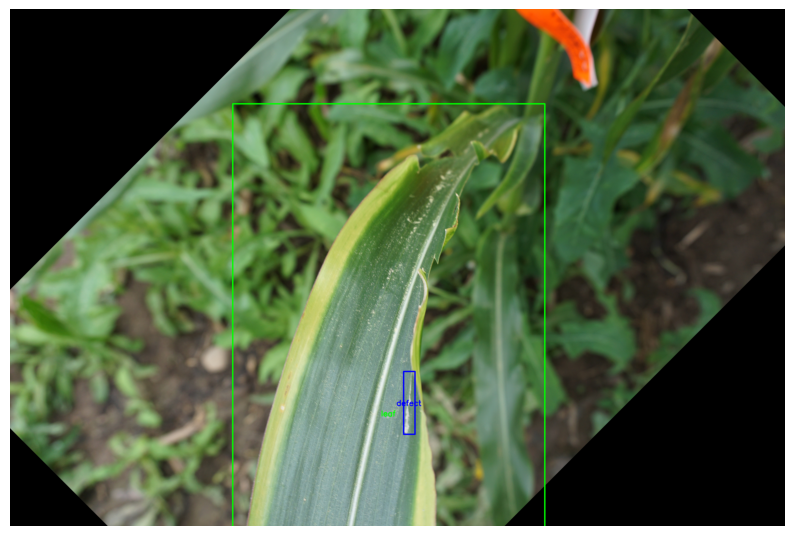

In [ ]:

# Provide the image and txt file paths
image_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_test_imgs/DSC00151_rotated.JPG'
txt_file_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/test_text_annotations/DSC00151_rotated.txt'

# Call the visualization function
visualize_bboxes_on_image(image_path, txt_file_path,class_mapping)

In [ ]:
output_path_train = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/train_text_annotations'
train_json ='/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json'
for filename in sorted(os.listdir(train_json)):
  json_file_path = os.path.join(train_json,filename)
  print(json_file_path)
  labelme_to_yolo(json_file_path,6000,4000,output_path_train)


/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00025.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00025_flip.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00025_rotated.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00025_scaled.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00026.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00026_flip.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00026_rotated.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_json/DSC00026_scaled.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf

leaf
(0, 255, 0)
defect
(0, 0, 255)
defect
(0, 0, 255)
defect
(0, 0, 255)
backgound plant
(255, 0, 0)
backgound plant
(255, 0, 0)
backgound plant
(255, 0, 0)


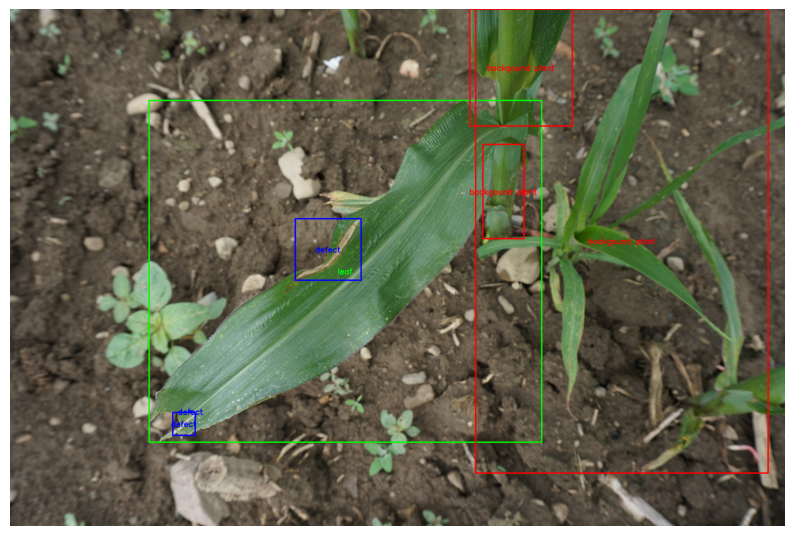

In [ ]:

# Provide the image and txt file paths
train_image_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_train_imgs/DSC00028_flip.JPG'
train_txt_file_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/train_text_annotations/DSC00028_flip.txt'

# Call the visualization function
visualize_bboxes_on_image(train_image_path, train_txt_file_path,class_mapping)

In [ ]:
output_path_valid = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/valid_text_annotations'
valid_json ='/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json'
for filename in sorted(os.listdir(valid_json)):
  json_file_path = os.path.join(valid_json,filename)
  print(json_file_path)
  labelme_to_yolo(json_file_path,6000,4000,output_path_valid)

/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00122 - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00122_flip - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00123 - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00123_flip - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00123_rotated - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00123_scaled - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00124 - Copy.json
/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_json/DSC00124_flip - Copy.json
/content/drive/MyD

backgound plant
(255, 0, 0)
leaf
(0, 255, 0)
defect
(0, 0, 255)
defect
(0, 0, 255)


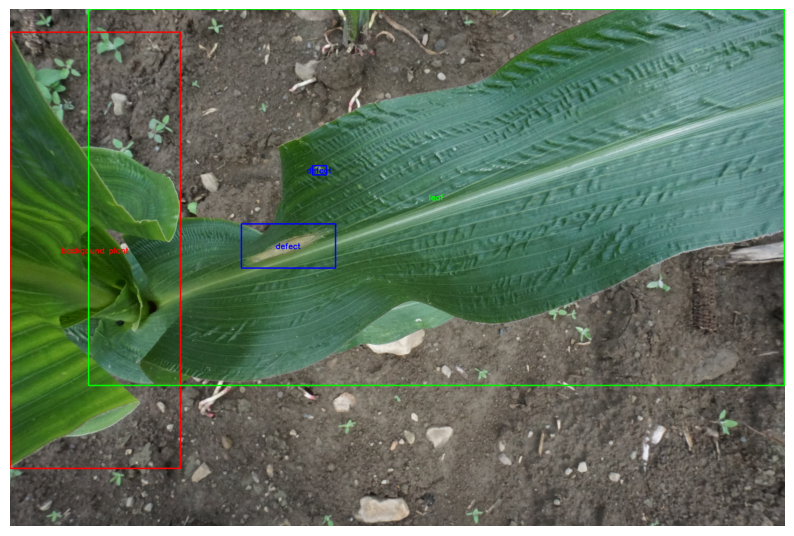

In [ ]:

# Provide the image and txt file paths
valid_image_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/all_valid_imgs/DSC00122.JPG'
valid_txt_file_path = '/content/drive/MyDrive/Multiclass_Image_Segmentation_Models/Leaf_disease_detection/valid_text_annotations/DSC00122.txt'

# Call the visualization function
visualize_bboxes_on_image(valid_image_path, valid_txt_file_path,class_mapping)